<a href="https://colab.research.google.com/github/Ayantika1998/Assignments/blob/main/Linear_and_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Library**

In [ ]:
import numpy as np  # for linear algebra
import pandas as pd #  for data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization
from scipy.stats import norm 
from scipy import stats

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from yellowbrick.regressor import PredictionError

# **Loading and checking dataset**

In [ ]:
df = pd.read_csv("Car price.csv")

In [ ]:
print('\nNumber of rows and columns in the data set: ',df.shape) #printing no. of rows and coloumns


Number of rows and columns in the data set:  (205, 26)


In [ ]:
df.head() # printing top 5 rows and columns in the dataset

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print('Data Info')
df.info() # checking no. of non_numerical coloumns

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    

# **Data Dictionary**

* **Indepenedent Variables**
  
  	
  fueltypes		
wheelbase	
carlength		
carheight	
curbweight	
highwaympg

* **Dependent Variable**highwaympg
 
 price




In [ ]:
df.drop(['ID',	'symboling', 'aspiration', 'doornumbers', 'carbody','drivewheels','enginelocation', 'name','carwidth', 'cylindernumber', 'enginesize',	'fuelsystem',	'boreratio', 'stroke',	'compressionratio','horsepower','peakrpm','citympg','enginetype'
], axis=1, inplace=True)
df

,fueltypes,wheelbase,carlength,carheight,curbweight,highwaympg,price
0,gas,88.6,168.8,48.8,2548,27,13495.0
1,gas,88.6,168.8,48.8,2548,27,16500.0
2,gas,94.5,171.2,52.4,2823,26,16500.0
3,gas,99.8,176.6,54.3,2337,30,13950.0
4,gas,99.4,176.6,54.3,2824,22,17450.0
...,...,...,...,...,...,...,...
200,gas,109.1,188.8,55.5,2952,28,16845.0
201,gas,109.1,188.8,55.5,3049,25,19045.0
202,gas,109.1,188.8,55.5,3012,23,21485.0
203,diesel,109.1,188.8,55.5,3217,27,22470.0


# **Exploratory Data Analysis(EDA)**

## Plots

* Correlation Plot


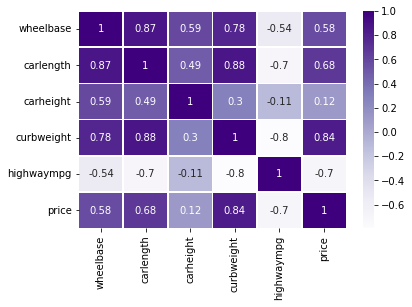

In [ ]:
corr= df.corr()
sns.heatmap(corr, cmap='Purples',annot = True, linewidth=.5)

* Scatterplot

In [ ]:
import plotly.express as px
fig = px.scatter_matrix(df, color = 'price')
fig.show()

* Pairplot

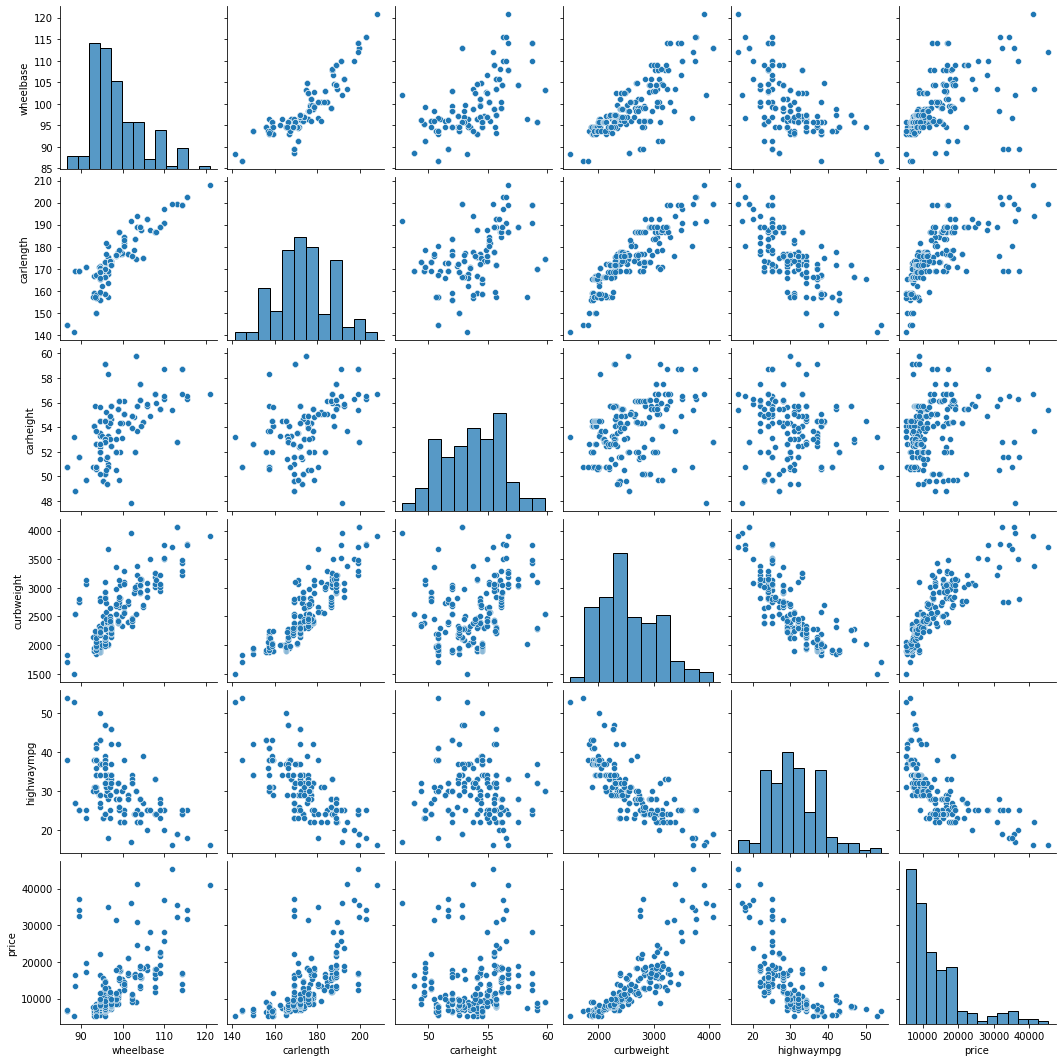

In [ ]:
sns.pairplot(df)

Histogram Plots of Traget Variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'price Distplot')

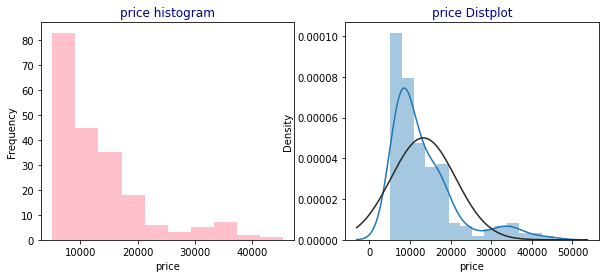

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df["price"], color="pink")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.title("price histogram", color = "darkblue")
plt.subplot(1,2,2)
sns.distplot(df["price"], fit=norm)
plt.title("price Distplot", color = "darkblue")

On the second graph we can see more clearly that there is a tail to the right. We can edit this in the feature review section. It will make our model better.

# **Data Preprocessing**


* Handling Missing Value

In [ ]:
df.isnull().sum()

fueltypes     0
wheelbase     0
carlength     0
carheight     0
curbweight    0
highwaympg    0
price         0
dtype: int64

No null value is present

* Feature Engineering

Encoding Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

Label Encoding One hot encoding Dummy variable trap

Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [ ]:
df["fueltypes"] = [0 if i == "gas" else 1 for i in df["fueltypes"]]
df["fueltypes"] = df["fueltypes"].astype("category")
dataframe = pd.get_dummies(df, columns= ["fueltypes"])
dataframe.head()

,wheelbase,carlength,carheight,curbweight,highwaympg,price,fueltypes_0,fueltypes_1
0,88.6,168.8,48.8,2548,27,13495.0,1,0
1,88.6,168.8,48.8,2548,27,16500.0,1,0
2,94.5,171.2,52.4,2823,26,16500.0,1,0
3,99.8,176.6,54.3,2337,30,13950.0,1,0
4,99.4,176.6,54.3,2824,22,17450.0,1,0


* Handling skewness of Target Variables

In [ ]:
(mu, sigma) = norm.fit(df["price"])
print("mu {} : {}, sigma {} : {}".format("price", mu, "price", sigma))

mu price : 13276.710570731706, sigma price : 7969.34350572002


There are many ways to fix this. one here I will use numpy library.

In [ ]:
df["price"] = np.log1p(df["price"])


In [ ]:
(mu, sigma) = norm.fit(df["price"])
print("mu {} : {}, sigma {} : {}".format("charges", mu, "charges", sigma))

mu charges : 9.354775918945913, sigma charges : 0.5025343955845537


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'price Distplot')

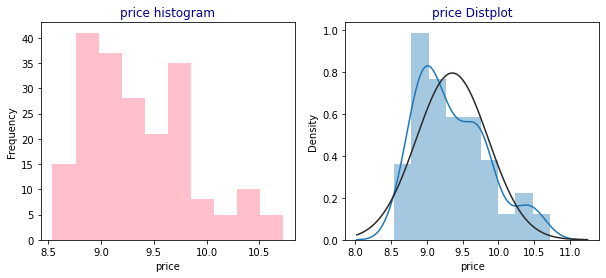

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df["price"], color="pink")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.title("price histogram", color = "darkblue")
plt.subplot(1,2,2)
sns.distplot(df["price"], fit=norm)
plt.title("price Distplot", color = "darkblue")

Now the target variable have a normal distribution

* Modeling

In [ ]:
df.columns

Index(['fueltypes', 'wheelbase', 'carlength', 'carheight', 'curbweight',
       'highwaympg', 'price'],
      dtype='object')

 * Dummy Variable Trap



Since, one dummy variable is highly correlated with other dummy variables, using all dummy variables for regression models leads to a dummy variable trap. So I have to consider one dummy variable columns as reference dummy and have to drop that column

In [ ]:
del dataframe['fueltypes_0']

In [ ]:
#Defining Independent and Dependent Varriable

y = dataframe.price
X = dataframe.drop(["price"], axis = 1)

In [ ]:
print(X)

     wheelbase  carlength  carheight  curbweight  highwaympg  fueltypes_1
0         88.6      168.8       48.8        2548          27            0
1         88.6      168.8       48.8        2548          27            0
2         94.5      171.2       52.4        2823          26            0
3         99.8      176.6       54.3        2337          30            0
4         99.4      176.6       54.3        2824          22            0
..         ...        ...        ...         ...         ...          ...
200      109.1      188.8       55.5        2952          28            0
201      109.1      188.8       55.5        3049          25            0
202      109.1      188.8       55.5        3012          23            0
203      109.1      188.8       55.5        3217          27            1
204      109.1      188.8       55.5        3062          25            0

[205 rows x 6 columns]


In [ ]:
print(y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


* Splitting dataset in Training Set and Test Set

In [ ]:
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = test_size, random_state = 20)

In [ ]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("Y_train shape {}, len {}.".format(Y_train.shape,len(Y_train)))
print("Y_test shape {}, len {}.".format(Y_test.shape,len(Y_test)))

X_train shape (164, 6), len 164.
X_test shape (41, 6), len 41.
Y_train shape (164,), len 164.
Y_test shape (41,), len 41.


## **Linear Regression**

Linear Regression establishes relationship between dependent variable y and one or more independent variable x using best fit line. It work on the principle of ordinary least square (OLS) / Mean square errror (MSE) . In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.

In [ ]:
multiple_linear = LinearRegression()
multiple_linear.fit(X_train, Y_train)
predict = multiple_linear.predict(X_test)


In [ ]:
score = r2_score(Y_test,predict)
print("r_square score --> ",score)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, predict)))

r_square score -->  0.504012134249215
Mean Absolute Error --> 2704.4164949433884
Mean Squared Error --> 15086807.850268172
Root Mean Squared Error --> 3884.174024199762


In [ ]:
multiple_linear.coef_

array([ -148.29941058,  -115.89498721,   -42.27558997,    17.74256418,
          35.42694534, -2658.44043365])

In [ ]:
multiple_linear.intercept_

4426.609540022968

In [ ]:
df_linearRegression = pd.DataFrame({'Actual': Y_test, 'Predicted': predict})
df_linearRegression.head()

,Actual,Predicted
5,15250.0,12199.595342
44,8916.5,4918.879982
155,8778.0,24381.526107
129,31400.5,28049.706498
152,6488.0,6635.292573


For Linear Regression, we see the actual result and the results we predicted.

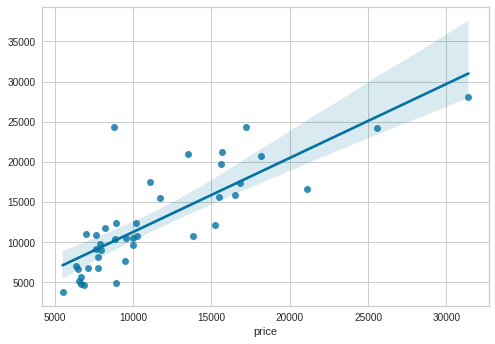

In [ ]:
sns.regplot(x= Y_test, y= predict, data=dataframe)

Linear Regression doesnot fit the data well

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
brst=load_breast_cancer()

In [ ]:
brst.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
dataframe_2=pd.DataFrame(brst['data'],columns=brst['feature_names'])

In [ ]:
dataframe_2['y_varaible'] =brst['target']

In [ ]:
dataframe_2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y_varaible
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
dataframe_2.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
y_varaible                 0
dtype: int64

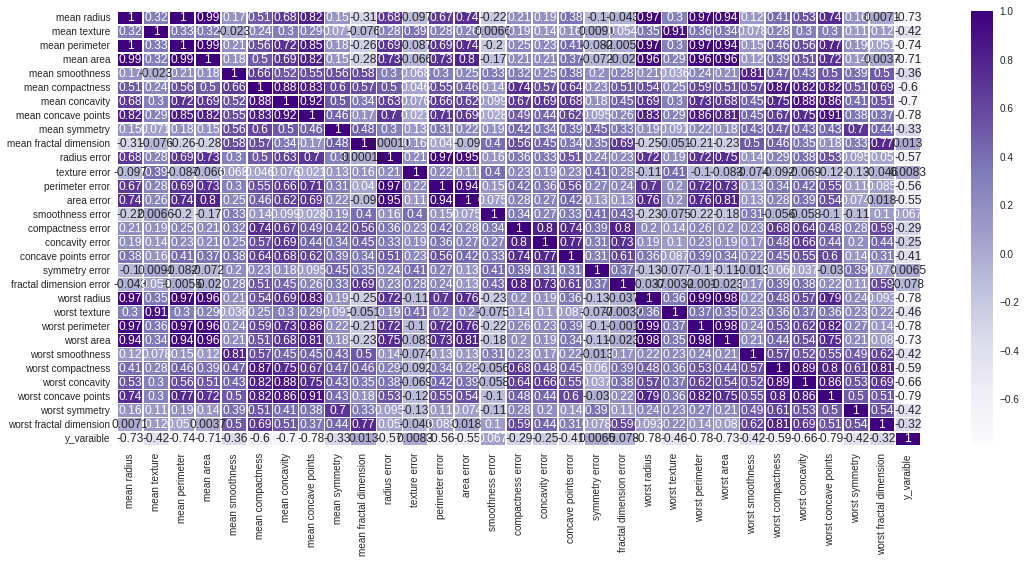

In [ ]:
plt.figure(figsize=(18,8))
corr_2= dataframe_2.corr()
sns.heatmap(corr_2, cmap='Purples',annot = True, linewidth=.5)


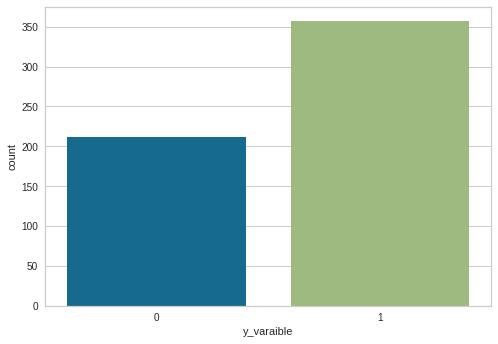

In [ ]:
sns.countplot(data=dataframe_2,x='y_varaible')

In [ ]:
x= dataframe_2.drop('y_varaible',axis=1)
y= dataframe_2['y_varaible']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=100)

In [ ]:
LogR=LogisticRegression()
LogR.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
predict=LogR.predict(x_test)
predict

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1])

In [ ]:
y_test

400    0
225    1
321    0
173    1
506    1
      ..
359    1
261    0
37     1
6      0
524    1
Name: y_varaible, Length: 114, dtype: int64

In [83]:
print(classification_report(predict,y_test))
print("\n")
print(confusion_matrix(predict,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        48
           1       0.97      0.95      0.96        66

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



[[46  2]
 [ 3 63]]
